In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import seaborn as sns
plt.style.use("ggplot")
#sns.set(style='white', color_codes=True)

cm = 1/2.54

# jupyter nbconvert xxx.ipynb --no-input

In [37]:
outputdiv = 100000
Ts = 0.01
tym = 5# sec
beads = 13
segments = beads-1

r_ATP2000 = np.array([0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.00])

In [3]:
out = tym/Ts
outs = out*outputdiv

In [4]:
ATP500files = glob.glob('Mstates/ATP500/MStates_Ts0.**.txt')
ATP500files = sorted(ATP500files, key=lambda x:x[-20:])

ATP2000files = glob.glob('Mstates/ATP2000/MStates_Ts0.**.txt')
ATP2000files = sorted(ATP2000files, key=lambda x:x[-20:])

In [5]:
columns = ['ts','im','mt','c','xc','yc','zc','xm','ym','zm','fx','fy','fz'] 
# ts = timestep, im = motor index, mt = motor type (active = 1, defective = 2)
# c = contact  state, xc|yc|zc = binding motor head position, xm|ym|zm = binding motor root position 
# fx|fy|fz = xyz motor force at the root??
act_m = []; act_d = []
def_m = []; def_d = []
bm_act = []; bm_def = []
ms_act = []; ms_def = []

for f in ATP2000files:
    print(f) # confirm data was sorted correctly!
    ms = pd.read_csv(f, names=columns, delim_whitespace=True)
    m = ms.drop(['im','xc','yc','zc','xm','ym','zm','fx','fy','fz'],axis=1)
    m_act = m[m.mt == 1]
    ms_act.append(m_act)
    m_def = m[m.mt == 2]
    ms_def.append(m_def)


Mstates/ATP2000/MStates_Ts0.01_S77T5R0.70.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.80.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.82.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.84.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.86.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.88.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.90.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.92.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.94.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.96.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R0.98.txt
Mstates/ATP2000/MStates_Ts0.01_S77T5R1.00.txt


In [6]:
act_seg = [[] for _ in range(segments)]
def_seg = [[] for _ in range(segments)]

for i in range(len(ms_act)):
    print(i)
    for j in range(segments):
        _ = ms_act[i][ms_act[i].c.between(j+1,j+2)]
        act_seg[j].append(_)
        _ = ms_def[i][ms_def[i].c.between(j+1,j+2)]
        def_seg[j].append(_)

0
1
2
3
4
5
6
7
8
9
10
11


In [7]:
act_seg_m = [[] for _ in range(segments)]
def_seg_m = [[] for _ in range(segments)]

act_seg_d = [[] for _ in range(segments)]
def_seg_d = [[] for _ in range(segments)]

act_ = []; def_ = []

for i in range(len(ms_act)):
    print(i)
    for j in range(segments):
        for k in np.arange(0,outs+1,outputdiv):
            _ = len(act_seg[j][i][act_seg[j][i].ts == k])
            act_.append(_)
            _ = len(def_seg[j][i][def_seg[j][i].ts == k])
            def_.append(_)
        act_seg_m[j].append(np.mean(act_))
        act_seg_d[j].append(np.std(act_))
        def_seg_m[j].append(np.mean(def_))
        def_seg_d[j].append(np.std(def_))
        act_ = []; def_ = []

0
1
2
3
4
5
6
7
8
9
10
11


In [8]:
a_m = [[] for _ in range(len(ms_act))]
d_m = [[] for _ in range(len(ms_act))]

a_d = [[] for _ in range(len(ms_act))]
d_d = [[] for _ in range(len(ms_act))]

for i in range(len(ms_act)):
    print(i)
    for j in range(segments):
        a_m[i].append(act_seg_m[j][i])
        d_m[i].append(def_seg_m[j][i])
        a_d[i].append(act_seg_d[j][i])
        d_d[i].append(def_seg_d[j][i])

0
1
2
3
4
5
6
7
8
9
10
11


In [ ]:
1.3,1.7,2.3,2.7

In [106]:
a = 1.3
c = 0
ind = 0
spc = [[] for _ in range(segments)]
for i in range(segments*3):
    if c < 2:
        #print(round(a,2))
        spc[ind].append(round(a,2))
        a+=0.4
        c+=1
    else:
        a+=0.2
        c=0
        ind+=1

In [107]:
spc

[[1.3, 1.7],
 [2.3, 2.7],
 [3.3, 3.7],
 [4.3, 4.7],
 [5.3, 5.7],
 [6.3, 6.7],
 [7.3, 7.7],
 [8.3, 8.7],
 [9.3, 9.7],
 [10.3, 10.7],
 [11.3, 11.7],
 [12.3, 12.7]]

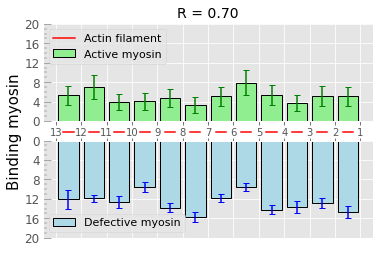

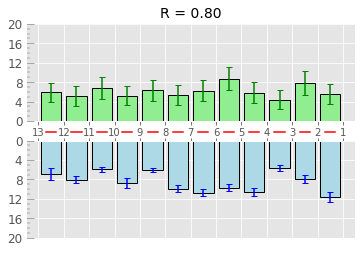

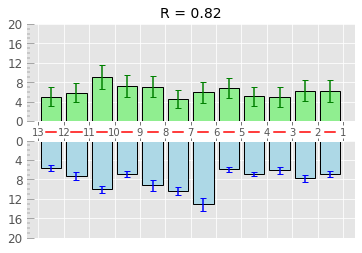

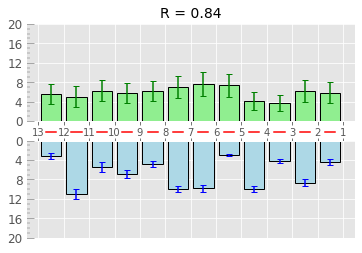

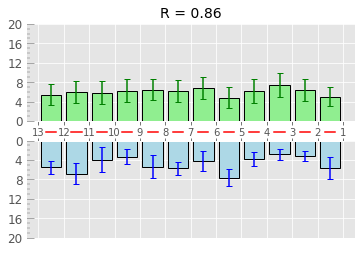

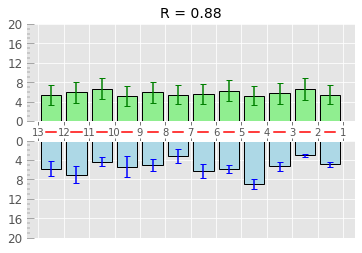

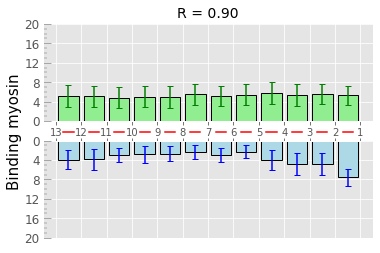

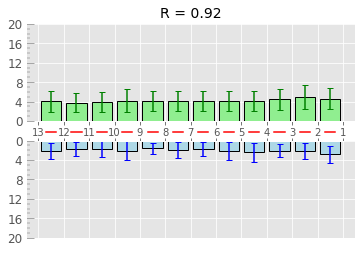

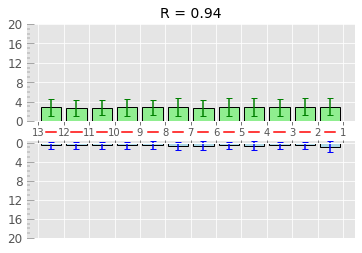

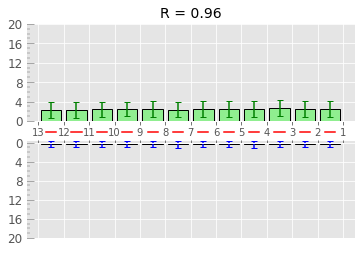

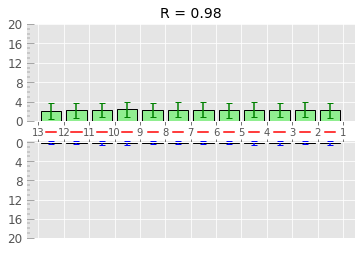

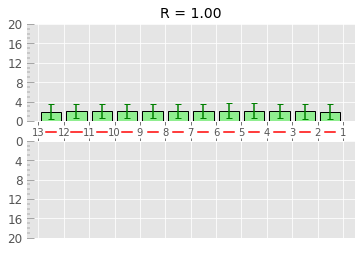

In [123]:

for i in range(len(ms_act)):
    fig = plt.figure(figsize=(15*cm,10*cm))
    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    #plt.subplots_adjust(hspace=0.15)

    bins = np.arange(1.5,13.5)
    ymax = 21; ystep = 4
    
    #circle = plt.Circle((7, 12), 0.5, color='b', fill=False)

    ax.bar(bins,a_m[i],yerr=a_d[i], lw=1, align='center', ecolor='green', capsize=3,facecolor='lightgreen', ec='black', label='Active myosin')
    #ax.add_patch(circle)
    trans = ax.get_xaxis_transform()
    for s in range(segments):
        if s == 0:
            ax.plot(spc[s],[-0.11,-0.11], color="r", transform=trans, clip_on=False, label='Actin filament')
        else:
            ax.plot(spc[s],[-0.11,-0.11], color="r", transform=trans, clip_on=False)
    ax.set_xticks(np.arange(1,14,1))
    ax.set_yticks(np.arange(0,ymax,ystep))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(1,13)
    #ax.spines['left'].set_bounds(0,ymax-1)
    ax.invert_xaxis()
    ax.minorticks_on()
    ax.tick_params(axis='y',direction='in',top=False,right=False,bottom=False,left=True,length=8, width=0.5,which='major', labelsize=12)
    ax.tick_params(axis='y',direction='in',top=False,right=False,bottom=False,left=True,length=4, width=0.4,which='minor', labelsize=12)
    ax.tick_params(axis='x',direction='out',top=False,right=False,bottom=True,left=True,which='major')
    ax.tick_params(axis='x',direction='in',top=False,right=False,bottom=False,left=True,which='minor')
    if r_ATP2000[i] == 0.7: 
        ax.legend(loc = 'upper left', fontsize=11)
    ax.set_title('R = %.2f'%(r_ATP2000[i]), fontsize=14)

    #======================================================

    ax2.bar(bins,d_m[i],yerr=d_d[i], lw=1, align='center', ecolor='blue', capsize=3,facecolor='lightblue', ec='black', label='Defective myosin')

    ax2.set_xticks(np.arange(1,14,1))
    ax2.set_yticks(np.arange(0,ymax,ystep))
    ax2.spines['bottom'].set_position('zero')
    ax2.spines['bottom'].set_bounds(1,13)
    #ax2.spines['left'].set_bounds(0,ymax-1)
    ax2.invert_yaxis()
    ax2.invert_xaxis()
    ax2.minorticks_on()
    ax2.tick_params(axis='y',direction='in',top=False,right=False,bottom=False,left=True,length=8, width=0.5,which='major', labelsize=12)
    ax2.tick_params(axis='y',direction='in',top=False,right=False,bottom=False,left=True,length=4, width=0.4,which='minor', labelsize=12)
    ax2.tick_params(axis='x',direction='in',top=False,right=False,bottom=True,left=True,which='major')
    ax2.tick_params(axis='x',direction='in',top=False,right=False,bottom=False,left=True,which='minor')
    ax2.set_xticklabels([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if r_ATP2000[i] == 0.7:
        ax2.legend(loc = 'lower left', fontsize=11)

    #fig.text(1.07, 0.5, 'Actin binding position', ha='center', fontsize=15)
    if r_ATP2000[i] == 0.7 or r_ATP2000[i] == 0.9:
        fig.text(0.04, 0.5, 'Binding myosin', va='center', rotation='vertical', fontsize=15)

    #plt.savefig('fig/ATP2000binding_bar_'+str(r_ATP2000[i])+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
    #plt.savefig('fig/ATP500binding_bar_'+str(r_ATP500[i])+'.pdf', format='pdf', dpi=500, bbox_inches='tight')

    plt.show()

In [127]:
!pdfjam --nup 3x3 --papersize '{45cm,30cm}' fig/ATP2000binding_bar_0.7.pdf fig/ATP2000binding_bar_0.82.pdf fig/ATP2000binding_bar_0.86.pdf fig/ATP2000binding_bar_0.9.pdf fig/ATP2000binding_bar_0.92.pdf fig/ATP2000binding_bar_0.98.pdf --outfile fig/ATP2000bar.pdf

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /usr/bin/pdfjam --nup '3x3' --papersize '{45cm,30cm}' --outfile fig/ATP2000bar.pdf -- fig/ATP2000binding_bar_0.7.pdf - fig/ATP2000binding_bar_0.82.pdf - fig/ATP2000binding_bar_0.86.pdf - fig/ATP2000binding_bar_0.9.pdf - fig/ATP2000binding_bar_0.92.pdf - fig/ATP2000binding_bar_0.98.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'fig/ATP2000bar.pdf'.


In [128]:
!pdfcrop --margins '5 5 5 5' fig/ATP2000bar.pdf fig/ATP2000bar.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `fig/ATP2000bar.pdf'.
